In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Problems

1. **Breakfast Cereals**. Use the data for the breakfast cereals to explore and summarize the data as follows:

    a. Which variables are quantitative/numerical? Which are ordinal? Which are nominal?

    b. Compute the mean, median, min, max, and standard deviation for each of the quantitative variables. This can be done using pandas.

    c. Plot a histogram for each of the quantitative variables. Based on the histograms and summary statistics, answer the following questions:
        i. Which variables have the largest variability?
        ii. Which variables seem skewed?
        iii. Are there any values that seem extreme?

    d. Plot a side-by-side boxplot comparing the calories in hot vs. cold cereals. What does this plot show us?

    e. Plot a side-by-side boxplot of consumer rating as a function of the shelf height. If we were to predict consumer rating from shelf height, does it appear that we need to keep all three categories of shelf height?

    f. Compute the correlation table for the quantitative variable (method corr()). In addition, generate a matrix plot for these variables (see Table 3.4 on how to do this using the seaborn library).
        i. Which pair of variables is most strongly correlated?
        ii. How can we reduce the number of variables based on these correlations?
        iii. How would the correlations change if we normalized the data first?

    g. Consider the first PC of the analysis of the 13 numerical variables in Table 4.12. Describe brieflywhat this PC represents.

In [2]:
cereals_df = pd.read_csv("../datasets/Cereals.csv")
cereals_df.head(9)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.00,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.00,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.00,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.00,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.00,0.75,34.384843
5,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.00,0.75,29.509541
6,Apple_Jacks,K,C,110,2,0,125,1.0,11.0,14.0,30.0,25,2,1.00,1.00,33.174094
7,Basic_4,G,C,130,3,2,210,2.0,18.0,8.0,100.0,25,3,1.33,0.75,37.038562
8,Bran_Chex,R,C,90,2,1,200,4.0,15.0,6.0,125.0,25,1,1.00,0.67,49.120253


In [3]:
cereals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     76 non-null     float64
 9   sugars    76 non-null     float64
 10  potass    75 non-null     float64
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(7), int64(6), object(3)
memory usage: 9.8+ KB


a) 

Quantitative/numerical variables:

    calories, protein, fat, sodium, fiber, sugars, potass, vitamin. weight, and cups

Ordinal

    Shelf, rating

Nominal

    name, mfr, type

b)

In [4]:
median = pd.DataFrame(cereals_df.median(), columns=["median"])
skew = pd.DataFrame(cereals_df.skew(), columns=["skew"])
summary_statistics = cereals_df.describe()

pd.concat([summary_statistics.T, median, skew], axis=1).T

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,76.000000,76.000000,75.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.802632,7.026316,98.666667,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.907326,4.378656,70.410636,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,42.500000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912
median,110.000000,3.000000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
skew,-0.445407,0.745830,1.165989,-0.575711,2.431675,0.112726,0.044445,1.400355,2.463704,-0.410339,0.309857,-0.104981,0.910240


c)

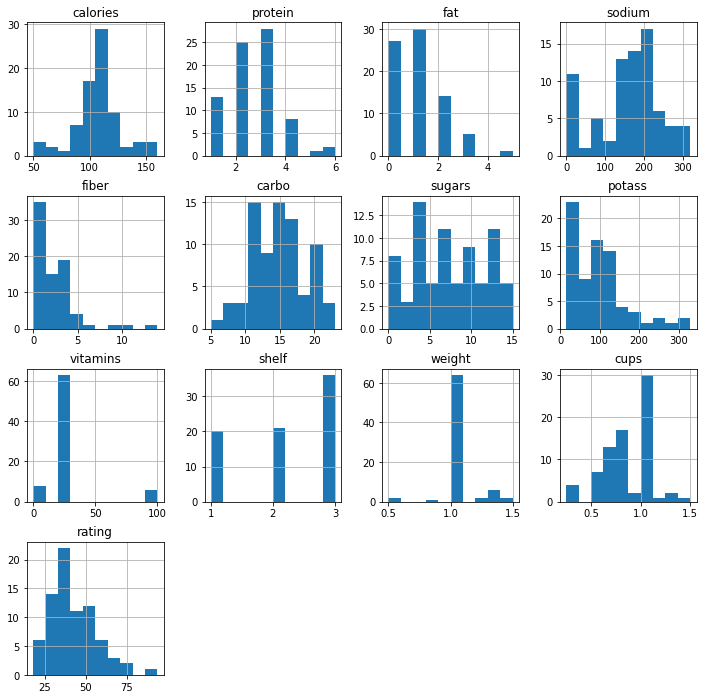

In [5]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
cereals_numeric_df = cereals_df.select_dtypes(include=numerics)

cereals_numeric_df.hist(figsize=(12, 12))
plt.show()

i. Which variables have the largest variability?

    calories, sodium, potassium, vitamins and rating

ii. Which variables seem skewed?

    protein, fat, fiber, potassium, vitamins and rating
  
iii. Are there any values that seem extreme?

    100 for vitamins seems too far from the 75th percentile as well as 330 and 320 for potassium and sodium,
    respectively

d)

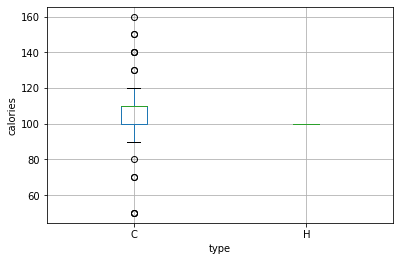

In [6]:
# side-by-side boxplot comparing the calories in hot vs. cold cereals
ax = cereals_df.boxplot(column="calories", by="type")
ax.set_ylabel("calories")
# suppress the titles
plt.suptitle("")
plt.title("")
plt.show()

In [7]:
mask = cereals_df.type == "H"
cereals_df[mask]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
20,Cream_of_Wheat_(Quick),N,H,100,3,0,80,1.0,21.0,0.0,NaN,0,2,1.0,1.00,64.533816
43,Maypo,A,H,100,4,1,0,0.0,16.0,3.0,95.0,25,2,1.0,1.00,54.850917
57,Quaker_Oatmeal,Q,H,100,5,2,0,2.7,NaN,NaN,110.0,0,1,1.0,0.67,50.828392


It shows only a single metric, the median, if a value of 100. This make sense because all the observations (only three) have this same value. Other important observation is that a "box" could not be created, as the distribution have no range at all. 

e)

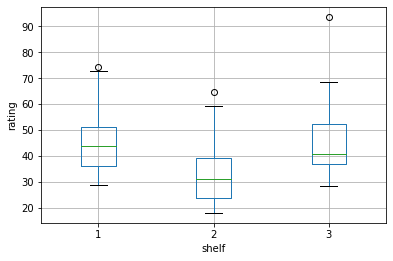

In [8]:
# side-by-side boxplot of consumer rating as a function of the shelf height
ax = cereals_df.boxplot(column="rating", by="shelf")
ax.set_ylabel("rating")
# suppress the titles
plt.suptitle("")
plt.title("")
plt.show()

From the side-by-side boxplot, one possibility would be to join the first and third shelfs products into one category as their interquartile range overlap significantly (25th around ratings of 35 and 75th around ratings of 50).